<a href="https://colab.research.google.com/github/Raghad770/VGG11-13-16-19-implementation-with-Keras/blob/main/VGG13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "raghadsayed" # username from the json file
os.environ['KAGGLE_KEY'] = "c77af906ed5f195ca3f3b6026290e88d" # key from the json file

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 336M/346M [00:03<00:00, 131MB/s]
100% 346M/346M [00:03<00:00, 118MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [5]:
! ls

gdrive				sample_data  seg_test
intel-image-classification.zip	seg_pred     seg_train


set paths of the training, test, and validation data

In [6]:
train_path='/content/seg_train/seg_train'
test_path='/content/seg_test/seg_test'
validation_path='/content/seg_train/seg_pred'

import important libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
import shutil
import glob

Data augmentation

In [8]:
img_height = 224
img_width = 224

training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                    rescale=1/255.0,
                                                                    validation_split=0.15)

train_generator = training_data_gen.flow_from_directory(train_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=64,
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='training') # set as training data

validation_generator = training_data_gen.flow_from_directory(train_path, # same directory as training data
                                                             target_size=(img_height, img_width),
                                                             batch_size=64,
                                                             shuffle=True,
                                                             class_mode='categorical',
                                                             subset='validation') # set as validation data
 

testing_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

test_generator = testing_data_gen.flow_from_directory(test_path,
                                                      target_size=(img_height, img_width),
                                                      batch_size=60,
                                                      seed=0,
                                                      shuffle=False,
                                                      class_mode='categorical') 

Found 11932 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


represent each image with a specific numb for each different class {'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }

In [9]:
train_generator.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

store the matrices of all images in array "img" and their labels in array "label"

In [ ]:
img,label=next(train_generator)
print(label)

[0. 0. 1. 0. 0. 0.]
2
glacier


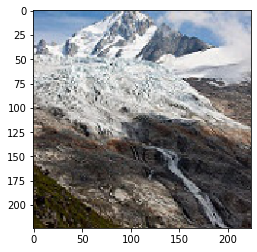

In [11]:
labels=['buildings','forest','glacier','mountain','sea','street']
image = img[1]
label = label[1]
print (label)
li=list(label)
res=li.index(1)
print(res)
print(labels[res])
plt.imshow(image)
plt.show()

0
/content/seg_train/seg_train/sea
/content/seg_train/seg_train/sea/6166.jpg
1
/content/seg_train/seg_train/mountain
/content/seg_train/seg_train/mountain/13177.jpg
2
/content/seg_train/seg_train/forest
/content/seg_train/seg_train/forest/12576.jpg
3
/content/seg_train/seg_train/buildings
/content/seg_train/seg_train/buildings/13624.jpg
4
/content/seg_train/seg_train/street
/content/seg_train/seg_train/street/3440.jpg
5
/content/seg_train/seg_train/glacier
/content/seg_train/seg_train/glacier/18638.jpg


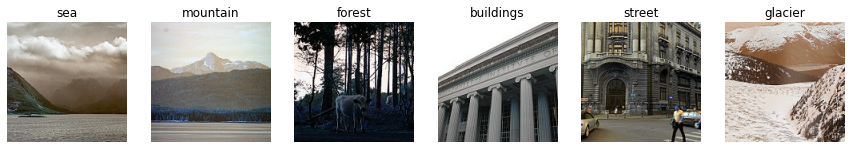

In [12]:
import cv2
%matplotlib inline
# to show images by bath form directory  
fig = plt.figure(figsize=(15,10))
columns = 6
rows = 1
fielName = train_path

for i in range(columns*rows ):
      # each loop takes a different name each file in the directory in order so first time takes mountain, street, buildings,....
      folderName = os.path.join((fielName), os.listdir(fielName)[i])
      print(i)
      print(folderName)
      img = cv2.imread(folderName+'/'+(os.listdir(folderName)[i]))
      print(folderName+'/'+(os.listdir(folderName)[i]))
      fig.add_subplot(rows, columns, i+1)
      plt.imshow(img)
      plt.axis('off')
      #to print each image with the folder name
      plt.title(os.path.basename(folderName))

plt.show()

impelemntation of VGG13 model

In [13]:
model_13=tf.keras.models.Sequential()

model_13.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same',input_shape=(224,224,3)))
model_13.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same"))
model_13.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_13.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_13.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_13.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_13.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_13.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_13.add(tf.keras.layers.Flatten())

model_13.add(tf.keras.layers.Dense(units=4096,activation='relu'))
model_13.add(tf.keras.layers.Dropout(.5))

model_13.add(tf.keras.layers.Dense(units=4096,activation='relu'))
model_13.add(tf.keras.layers.Dropout(0.5))

model_13.add(tf.keras.layers.Dense(units=6,activation='softmax'))


In [14]:
model_13.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [15]:
model_13.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history_13=model_13.fit(train_generator,validation_data=validation_generator, epochs=10,verbose=1)

Epoch 1/10
187/187 [==============================] - 338s 2s/step - loss: 1.1540 - accuracy: 0.5189 - val_loss: 0.9994 - val_accuracy: 0.5928
Epoch 2/10
187/187 [==============================] - 262s 1s/step - loss: 0.8609 - accuracy: 0.6564 - val_loss: 0.8249 - val_accuracy: 0.6836
Epoch 3/10
187/187 [==============================] - 262s 1s/step - loss: 0.7090 - accuracy: 0.7298 - val_loss: 0.7242 - val_accuracy: 0.7127
Epoch 4/10
187/187 [==============================] - 262s 1s/step - loss: 0.5948 - accuracy: 0.7768 - val_loss: 0.5365 - val_accuracy: 0.8040
Epoch 5/10
187/187 [==============================] - 262s 1s/step - loss: 0.5101 - accuracy: 0.8153 - val_loss: 0.4959 - val_accuracy: 0.8316
Epoch 6/10
187/187 [==============================] - 262s 1s/step - loss: 0.4491 - accuracy: 0.8388 - val_loss: 0.5131 - val_accuracy: 0.8197
Epoch 7/10
187/187 [==============================] - 262s 1s/step - loss: 0.3768 - accuracy: 0.8651 - val_loss: 0.4259 - val_accuracy: 0.8554

Save the training history

In [19]:
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_13', 'wb') as file_pi:
        pickle.dump(history_13.history, file_pi)

model_13.save('model_13.h5')

In [20]:
! ls

gdrive				model_13.h5  seg_pred  seg_train
intel-image-classification.zip	sample_data  seg_test
